<a href="https://colab.research.google.com/github/koushik395/Machine-Learning/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Write a program to implement Support Vector Machine algorithm to classify the data set. Print both correct and wrong predictions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Titanic Dataset.
## You can download the Dataset From Kaggle -> [kaggle](https://www.kaggle.com/datasets/brendan45774/test-file)

In [ ]:
titanic = pd.read_csv("tested.csv")
df = pd.DataFrame(titanic)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Replacing the Gender with Binary numbers.

In [ ]:
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Replacing the missing values with mean and median.
## Here we will not replace Cabin as we dont use that feature.

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

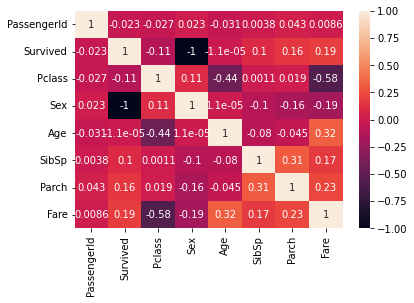

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.030874,0.003818,0.043080,0.008633
Survived,-0.023245,1.000000,-0.108615,-1.000000,-0.000011,0.099943,0.159120,0.192036
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.440782,0.001087,0.018721,-0.577313
Sex,0.023245,-1.000000,0.108615,1.000000,0.000011,-0.099943,-0.159120,-0.192036
Age,-0.030874,-0.000011,-0.440782,0.000011,1.000000,-0.079535,-0.045073,0.324568
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.079535,1.000000,0.306895,0.171912
Parch,0.043080,0.159120,0.018721,-0.159120,-0.045073,0.306895,1.000000,0.230325
Fare,0.008633,0.192036,-0.577313,-0.192036,0.324568,0.171912,0.230325,1.000000


In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

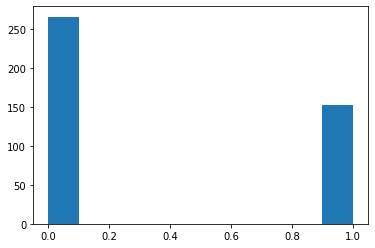

In [ ]:
plt.hist(df['Survived'])

In [ ]:
df['Survived'].value_counts()/np.float(len(df))*100

<ipython-input-44-d5d8f07719d8>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Survived'].value_counts()/np.float(len(df))*100


0    63.636364
1    36.363636
Name: Survived, dtype: float64

## Balancing the Number of death people with the survived rate.

In [ ]:
death_count =len(df[df['Survived']==0])
survived_count=len(df[df['Survived']==1])
print("Death count of Passengers = ",death_count)
print("Survived count of Passengers = ",survived_count)

Death count of Passengers =  266
Survived count of Passengers =  152


In [ ]:
death_index = df[df['Survived']==0].index
survived_index = df[df['Survived']==1].index
print(survived_index,death_index)

Int64Index([  1,   4,   6,   8,  12,  14,  15,  18,  19,  22,
            ...
            395, 397, 400, 402, 408, 409, 410, 411, 412, 414],
           dtype='int64', length=152) Int64Index([  0,   2,   3,   5,   7,   9,  10,  11,  13,  16,
            ...
            401, 403, 404, 405, 406, 407, 413, 415, 416, 417],
           dtype='int64', length=266)


## Randomly Picking up death indexes according to Number of people survived.

In [ ]:
new_balancedFrame = np.random.choice(death_index,survived_count,replace=False)
new_balancedFrame

array([171, 377,  20, 265,  42, 209, 254, 348, 126, 192,  64,  39, 308,
       342, 128, 287, 108,  28, 403, 194,   9, 335, 167, 390, 198, 201,
       372, 133, 399,  35, 121,   2, 299, 204, 183,  83, 190, 145, 357,
        54,  23, 358, 378, 256, 257,  31,  95, 172, 255,  10, 154,  85,
       401, 115, 355, 381,  56, 189, 242, 302, 387, 289,  89, 312, 116,
       219, 303, 269, 328, 295, 205, 340,  51, 134, 276,  50, 373, 277,
       253, 147, 337,  97, 351, 212,  60, 370, 388, 281, 285,  84,  91,
         3, 327, 288, 166,  57, 393, 124,  30, 406, 261, 271, 207, 109,
       380, 325, 177, 237,  61, 417,  82,  67, 405, 310, 316, 319,  99,
       363, 331, 107, 270, 369, 173,  34, 234, 279, 144, 103, 217, 195,
       346, 161,   5, 106, 101, 344, 230, 323, 223, 379, 229, 392, 407,
        16,  93,  21, 149, 142, 415,  94, 386, 336])

In [ ]:
df1 = df.iloc[new_balancedFrame]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,1063,0,3,"Zakarian, Mr. Ortin",1,27.00000,0,0,2670,7.2250,NaN,C
377,1269,0,2,"Cotterill, Mr. Henry Harry""""",1,21.00000,0,0,29107,11.5000,NaN,S
20,912,0,1,"Rothschild, Mr. Martin",1,55.00000,1,0,PC 17603,59.4000,NaN,C
265,1157,0,3,"Lyntakoff, Mr. Stanko",1,30.27259,0,0,349235,7.8958,NaN,S
42,934,0,3,"Goldsmith, Mr. Nathan",1,41.00000,0,0,SOTON/O.Q. 3101263,7.8500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
142,1034,0,1,"Ryerson, Mr. Arthur Larned",1,61.00000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
94,986,0,1,"Birnbaum, Mr. Jakob",1,25.00000,0,0,13905,26.0000,NaN,C
386,1278,0,3,"Aronsson, Mr. Ernst Axel Algot",1,24.00000,0,0,349911,7.7750,NaN,S


In [ ]:
df1['Survived'].value_counts()

0    152
Name: Survived, dtype: int64

## Concatenating the both dataframes.

In [ ]:
new_df=pd.concat([df1, df.iloc[survived_index]], axis = 0)
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,1063,0,3,"Zakarian, Mr. Ortin",1,27.00000,0,0,2670,7.2250,NaN,C
377,1269,0,2,"Cotterill, Mr. Henry Harry""""",1,21.00000,0,0,29107,11.5000,NaN,S
20,912,0,1,"Rothschild, Mr. Martin",1,55.00000,1,0,PC 17603,59.4000,NaN,C
265,1157,0,3,"Lyntakoff, Mr. Stanko",1,30.27259,0,0,349235,7.8958,NaN,S
42,934,0,3,"Goldsmith, Mr. Nathan",1,41.00000,0,0,SOTON/O.Q. 3101263,7.8500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",0,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",0,30.27259,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.00000,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.00000,0,0,347086,7.7750,NaN,S


In [ ]:
new_df['Survived'].value_counts()

0    152
1    152
Name: Survived, dtype: int64

(array([152.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

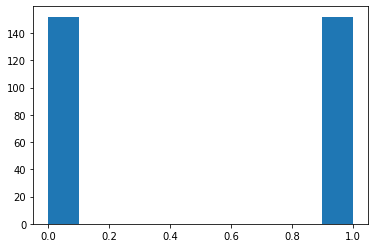

In [ ]:
plt.hist(new_df['Survived'])

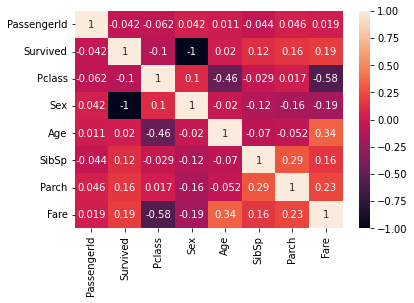

In [ ]:
import seaborn as sns
sns.heatmap(new_df.corr(),annot=True)

## Time for Model Training.

In [ ]:
X = new_df.drop(['Survived','Name','Cabin','Embarked','Ticket'],axis=1)
y = new_df['Survived'].values
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
171,1063,3,1,27.00000,0,0,7.2250
377,1269,2,1,21.00000,0,0,11.5000
20,912,1,1,55.00000,1,0,59.4000
265,1157,3,1,30.27259,0,0,7.8958
42,934,3,1,41.00000,0,0,7.8500
...,...,...,...,...,...,...,...
409,1301,3,0,3.00000,1,1,13.7750
410,1302,3,0,30.27259,0,0,7.7500
411,1303,1,0,37.00000,1,0,90.0000
412,1304,3,0,28.00000,0,0,7.7750


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Use Support Vector Classifier to classify and predict the values.

In [ ]:
from sklearn.svm import SVC
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


##  Print both correct and wrong predictions.

In [ ]:
# Predicting the Test set results
y_pred = svc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Model Evaluation

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  0]
 [ 0 39]]


1.0